In [ ]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import time
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
#import gensim

## Q1

In [ ]:
url="https://thinkil.co.il/texts-sitemap.xml"
res=requests.get(url, verify=False)
soup = BeautifulSoup(res.content, ['lxml', 'xml'])
soup_list = soup.findChildren('loc')
urls_list = []
for element in soup_list:
    net = element.get_text()
    if net.endswith(('jpg','png')) == False: 
        urls_list.append(net)
#remove the first link
dat = pd.DataFrame(columns=['url','title','auther','text'])
dat.url = urls_list[1:]

In [ ]:
for i in range(len(dat)):
    time.sleep(1)
    res = requests.get(dat.loc[i,'url'])
    res.content
    soup = BeautifulSoup(res.content, 'html.parser')
    title_author = soup.findChildren('hgroup')[0].get_text().split('מאת:')
    title = title_author[0]
    author = title_author[1]
    text = soup.findChildren('article')[0].get_text()
    dat.loc[i,1:] = [title,author,text]

In [ ]:
dat.to_csv('articles_data.tsv', sep='\t')

In [121]:
dat = pd.read_csv('articles_data.tsv', sep='\t', index_col='Unnamed: 0')
dat

,url,title,auther,text
0,https://thinkil.co.il/texts/m064p010-019/,הפסיכולוגיה של האי ודאות,עמוס טברסקי מיה בר-הלל,\r\n\r\n\r\n הקדמה:\r\n ...
1,https://thinkil.co.il/texts/m064p020-027/,הפרדוקסליות של הוודאות,יהושע אריאלי,\r\n\r\n\r\n הקדמה:\r\n ...
2,https://thinkil.co.il/texts/m064p028-039/,המשמעות שמעבר לצלילים,אסתר שינברג,\r\n\r\n\r\n הקדמה:\r\n ...
3,https://thinkil.co.il/texts/m064p040-047/,מישהו יודע משהו שמישהו אחר …,אריאל רובינשטיין,\r\n\r\n\r\n הקדמה:\r\n ...
4,https://thinkil.co.il/texts/m064p048-055/,דטרמיניזם וחופש הרצון,אבישי מרגלית,\r\n\r\n\r\n הקדמה:\r\n ...
...,...,...,...,...
277,https://thinkil.co.il/texts/m016p008-009/,האיש שלנו באוניברסיטה,,\r\n\r\n\r\nבאוגוסט 1965 נערכה באוניברסיטה העב...
278,https://thinkil.co.il/texts/m016p010-012/,שתי ערים,,\r\n\r\nמבחינה גיאוגרפית מפריד מרחק של כ-20 ק״...
279,https://thinkil.co.il/texts/m016p014-015/,שרות ואחזקה בדור המחשבים השלישי,,\r\n\r\nהופעת המערכת י.ב.מ./360 כנציגתה המובהק...
280,https://thinkil.co.il/texts/m016p016-016/,ידיעות מעולם המחשבים,,\r\n\r\nקורס תיכנות בבית סהר\r\nאסיר בן 34 השפ...


## Q2a-b

In [ ]:
def to_words(text):
    return text.split()

def words_num_bar(texts):
    words_num = [len(to_words(text)) for text in texts]
    plt.bar(range(len(words_num)), words_num, color='b')
    plt.tight_layout()
    plt.show()

def words_num_hist(texts):
    words_num = [len(to_words(text)) for text in texts]
    plt.hist(words_num, bins=50)

    plt.show()
    

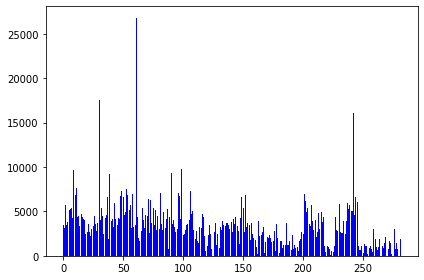

In [126]:
words_num_bar(dat.text)

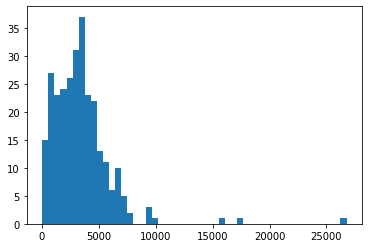

In [127]:
words_num_hist(dat.text)

## Q2c

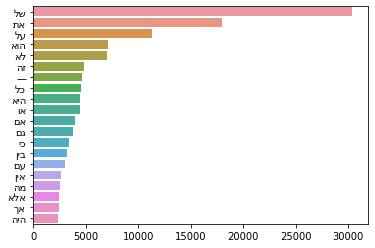

In [125]:
all_words = " ".join(dat["text"]).split()

def invert_words(words):
    return [w[::-1] for w in words]

def plot_20_common(words):
    word_count = Counter(words)
    most=word_count.most_common(20)
    x, y= zip(*most)
    sns.barplot(x=y,y=invert_words(x))
    
plot_20_common(all_words)

## Q2e

In [ ]:
stop = list(pd.read_csv('heb_stopwords.txt', sep='\n', header=None)[0])

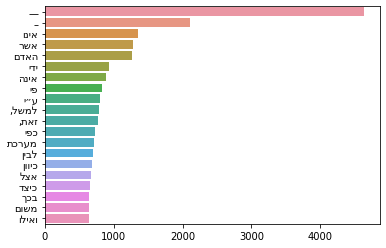

In [124]:
all_words = " ".join(dat["text"]).split()

def invert_words(words):
    return [w[::-1] for w in words]

def plot_20_common_without_stop(words):
    word_count = Counter(words)
    most=word_count.most_common()
    x, y= [], []
    for word,count in most:
        if (word not in stop):
            x.append(word)
            y.append(count)
        if len(x)==20:
            break

    sns.barplot(x=y,y=invert_words(x))
    
plot_20_common_without_stop(all_words)

## Q2 d + f

In [ ]:
all_words = " ".join(dat["text"]).split()
all_words

In [122]:
def merge(list1, list2): 
      
    merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))] 
    return merged_list 

def plot_top_ngrams_barchart(text, n=2,stop_word=False):
    vec = CountVectorizer(ngram_range=(n, n)).fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    if (stop_word):
        x, y= [], []
        for word,count in words_freq:
            word = word.split()
            if (word[0] not in stop and word[1] not in stop):
                word = word[0] + " " + word[1]
                x.append(word)
                y.append(count)
            if len(x)==20:
                break
        words_freq = merge(x,y)
    words_freq = words_freq[:10]
    x,y=map(list,zip(*words_freq))
    sns.barplot(x=y,y=invert_words(x))

#plot_top_ngrams_barchart(all_words,2)

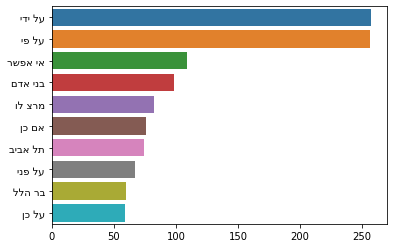

In [123]:
plot_top_ngrams_barchart(all_words,2,False)

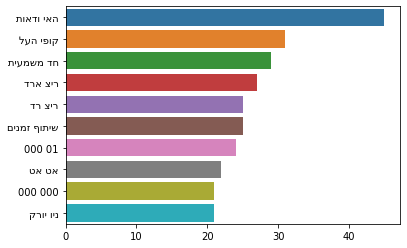

In [82]:
plot_top_ngrams_barchart(all_words,2,True)

## Q3

נראה שלא קיבלנו הרבה מידע מצירופי המילים השכיחים. לא ראינו קושי מיוחד לשפה העברית, אבל כן צורך בניקוי הטקסט מסימנים וממספרים.

1. על סמך האורך של המאמרים אפשר להבין כי זה אתר שולקח ברצינות את המשימה שלו. לצערנו המילים הנפוצות או זוגות המילים הנפוצות לא מלמדות אותנו הרבה. ניתן לשים לב שיצא לנו הרבה מילות קישור, יתכן שזה מאפיין של השפה העברית. רק בצירופי מילים ללא סטופ וורד לא קיבלנו שאחת התוצאות היא מילת קישור. 
2. עברית היא שפה שנכתבת מימין לשמאל, ולכן נדרשנו לזכור להפוך את הטקסט, אפילו יצרנו פונקציה מיוחדת עבור זה, אחרת התוצאה לא מובנת.
אך מלבד זאת לא היינו לנו בעיות מיוחדות.
3. נדרש עוד נקיון, למשל להוריד את התו ' על מנת שהמילה ריצ'ארד, לא תתפצל כמו שקרה אצלנו
